In [21]:
#pip install tensorflow transformers  tf-keras pandas matplotlib seaborn 
from transformers import pipeline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_classifier():
    classifier = pipeline("text-classification", 
                          model="j-hartmann/emotion-english-distilroberta-base", 
                          return_all_scores=True) 
    return classifier

In [11]:
def load_data(filepath):
    data_emotions_path = (filepath).split("/")[-1].split(".")[0] + "_with_emotion_scores.csv"
    data_in = pd.read_csv(filepath)
    data_emotions = pd.read_csv(filepath)
    data_emotions[["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]] = ""
    return data_in, data_emotions, data_emotions_path

In [6]:
def emotion_classifier(data_in, data_emotions, classifier, data_emotions_path):
    for sent in range(len(data_in["Sentence"])):
        sentence = data_in["Sentence"][sent]
        if type(sentence) == str:
            emotion_dicts = classifier(sentence)[0]
            emotion_scores = []
            for dict in emotion_dicts:
                score = dict["score"]
                emotion_scores = emotion_scores + [score]
            data_emotions.loc[sent, "anger":"surprise"] = emotion_scores
    data_emotions.to_csv(emotions_path)
    return print("Emotion scores for each sentence in the dataset have been saved to the outfolder")

In [7]:
classifier = load_classifier()
data_in, data_out = load_data("../in/GoT-scripts/Game_of_Thrones_Script.csv")
data_out = emotion_classifier(data_in, classifier, data_out, "../out/emotion_scores.csv")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [28]:
#read in saved df 
data_emotions = pd.read_csv("../out/emotion_scores.csv", index_col=0)
#make long format to use in plots
data_emot_long = pd.melt(data_emotions, id_vars=(['Sentence', 'Season', 'Episode']), value_vars=["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"])

In [ ]:
#inspect data
data_emot_long["variable"].value_counts()
data_emotions.describe(include="all")

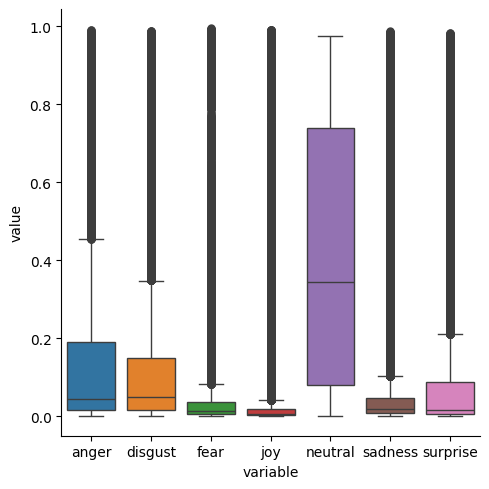

In [38]:
#boxplot
sns.catplot(data_emot_long, x="variable", y="value", kind="box", hue = "variable")
#plt.savefig("../out/boxplot_wo_neutral.png")


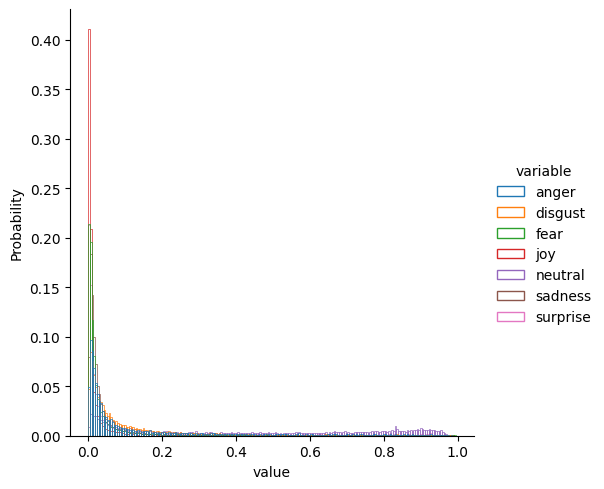

In [37]:
#sns.displot(data_emot_long, x="value", col = "Season", hue = "variable", kde=True, stat="density", common_norm=False)
sns.displot(data_emot_long, x="value",hue = "variable", kde=False, stat="probability", fill = False, common_norm = False)

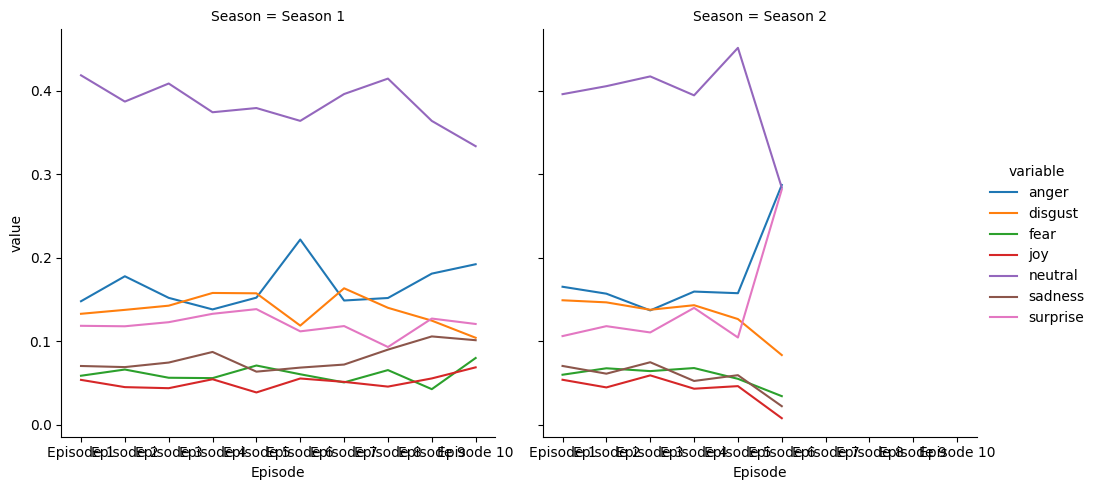

In [66]:
#sns.displot(data_long, x="value", col = "Season", hue = "variable", kde=True)
#sns.displot(data_long, x="value", col = "Season", hue = "variable", kind = "kde", bw_adjust = .2)
#sns.displot(data_long, x="value", hue="variable", col = "Season", multiple="stack")
#sns.catplot(data_long, x="variable", y="value", kind="box", col = "Season")
#sns.catplot(data_long, x="variable", y="value", kind="boxen", col = "Season", hue = "variable")

sns.relplot(x="Episode", y="value", hue="variable", kind = "line", errorbar = None, col = "Season", data=data_long)